## USED CAR SALES PRICE DETERMINATION PROBLEM

## PRICING ANALYSIS BY: ADESOLA OBANLA

## Import Libraries

In [1]:
# import libraries to be used

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, \
mean_absolute_error

## Load the Dataset

In [2]:
# Load the dataset 
data = pd.read_csv("used_cars_data.csv")

In [3]:
# Read the 1st 5 record of the dataset
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


## Copy the data into another variable

In [5]:
# copy data to another variable called df
# Have a copy of the original data and work on the copied data
df= data.copy()
df

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


From above view of the data, i have 7,253 records  with 14 columns. 
The target column is the price column but i have the mileage measurement both in kpml and kp/mg.
Power measurement in bhp meaning object data type, and Engine measurement  in CC equally as object data type instead of int.
I want to convert the kp/mg measurement to kpml and convert all from object dtype to float

In [6]:
# check the missing values in Mileage column as it was discovered that mileage has 7,251 non null values 
# out of 7253 records meaning 2 records are missing
df= df[df['Mileage']!= 'nan']

#df['Mileage'] = df['Mileage'].fillna(0)
#df['Mileage'] = df['Mileage'].reset_index(drop = True) 
#df['col1'] = df['col1'].fillna(df['col1'].median())

In [7]:
df['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7253, dtype: object

In [8]:
# convert the mileage in 'km/kg' and kmpl to integer

Converted_Mileage= []
for i in df.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-6]
        i = float(i)*1.40
        Converted_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-6]
        Converted_Mileage.append(float(i))
    else:
        Converted_Mileage.append(float(i))

In [9]:
# Call the Converted Mileage to view its data

Converted_Mileage

[37.24,
 19.6,
 18.0,
 20.7,
 15.0,
 29.54,
 23.0,
 11.3,
 20.5,
 22.0,
 21.5,
 16.0,
 25.0,
 12.0,
 0.0,
 13.0,
 25.0,
 28.0,
 20.4,
 14.8,
 22.6,
 23.6,
 13.5,
 18.0,
 14.0,
 16.0,
 23.0,
 20.9,
 17.0,
 12.0,
 19.0,
 14.5,
 11.1,
 12.0,
 16.0,
 14.0,
 24.0,
 18.1,
 11.7,
 22.0,
 19.0,
 25.0,
 25.3,
 18.0,
 14.6,
 14.2,
 14.0,
 11.2,
 24.0,
 16.5,
 17.1,
 22.0,
 17.0,
 28.0,
 18.0,
 15.0,
 25.1,
 20.3,
 13.2,
 18.0,
 13.6,
 20.0,
 11.7,
 15.0,
 25.0,
 16.5,
 16.0,
 0.0,
 24.5,
 22.0,
 8.0,
 15.0,
 16.9,
 19.6,
 16.0,
 18.5,
 17.0,
 12.0,
 12.0,
 0.0,
 22.0,
 17.5,
 18.0,
 20.0,
 23.0,
 17.0,
 16.7,
 20.3,
 18.0,
 17.0,
 17.0,
 13.0,
 17.6,
 22.0,
 15.0,
 25.0,
 22.0,
 16.0,
 18.0,
 15.2,
 23.0,
 18.0,
 19.8,
 14.9,
 17.0,
 14.0,
 17.7,
 14.7,
 16.0,
 22.3,
 11.3,
 15.0,
 25.0,
 22.6,
 13.0,
 12.9,
 23.0,
 19.1,
 10.0,
 24.0,
 17.0,
 15.0,
 22.0,
 18.0,
 21.0,
 12.0,
 11.0,
 37.24,
 10.0,
 21.2,
 20.7,
 16.0,
 21.0,
 24.0,
 19.0,
 17.0,
 19.0,
 20.5,
 19.0,
 13.0,
 19.2,
 25.0,
 22.0,


In [10]:
# Assign converetd mileage back to column Mileage in the origibal dataset
df['Mileage'] = Converted_Mileage

In [11]:
# Check the data
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968 CC,140.8 bhp,5.0,53.14,17.74


Column Engine and Power are both in string of mixed numbers. I want to take out the means of measurement and convert to float dtype

In [12]:
# convert column Engine and Power to float or Int data type
df['Engine'] = df['Engine'].str.replace('CC','')
df['Engine'] = df['Engine'].astype(float)
df['Power'] = df['Power'].str.replace('bhp', '')
df['Power'] = df['Power'].astype(float)

In [13]:
df.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,53.14,17.74


It appears all the string have been cleared from columns Engine, Mileage and Power. Check the datatypes to confirm


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   float64
 9   Engine             7207 non-null   float64
 10  Power              7078 non-null   float64
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 850.0+ KB


In [15]:
# Check the existence of null values in the data
df.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [16]:
# check if the data contains duplicates
df.duplicated().sum()

0

From the above, Price is the target variable and it has 1234 null values. The records have no duplicates.
I will drop all the nan values from the target variabes and classify the other variables into categorical and numerical
and treat all the null values in the data

In [17]:
# The Price which is the target has about 1,234 null values, so i will drop all the null values in price
df.dropna(subset = ['Price'], inplace = True)

In [18]:
# Check that Price has no null values
df['Price'].isnull().sum()

0

In [19]:
# Check the existence of null values in the data
df.isnull().sum()

S.No.                  0
Name                   0
Location               0
Year                   0
Kilometers_Driven      0
Fuel_Type              0
Transmission           0
Owner_Type             0
Mileage                2
Engine                36
Power                143
Seats                 42
New_Price              0
Price                  0
dtype: int64

In [20]:
# The S/no and Name of cars is not necessary so i will drop it

df =df.drop(["S.No.","Name"], axis =1)

In [21]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,5.51,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,16.06,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,8.61,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,11.27,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,53.14,17.74


Get the categorical variable and the numerical Variable to see if there are null values and treat all null values

In [22]:
## working to ensure the null values are sorted

## Get the categorical values

cat_cols = df.select_dtypes(include = "object").columns.to_list()
cat_cols

['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']

In [23]:
## list the categorical colums and their attribute

for col in cat_cols:
    print(df[col].value_counts())
    print('-' * 40)


Mumbai        790
Hyderabad     742
Kochi         651
Coimbatore    636
Pune          622
Delhi         554
Kolkata       535
Chennai       494
Jaipur        413
Bangalore     358
Ahmedabad     224
Name: Location, dtype: int64
----------------------------------------
Diesel      3205
Petrol      2746
CNG           56
LPG           10
Electric       2
Name: Fuel_Type, dtype: int64
----------------------------------------
Manual       4299
Automatic    1720
Name: Transmission, dtype: int64
----------------------------------------
First             4929
Second             968
Third              113
Fourth & Above       9
Name: Owner_Type, dtype: int64
----------------------------------------


From the above,Location, Fuel Types, Transmission and Owner_types are all Categorical Variable.
WIll check thier attributes to see the existence of null values and will treat any null values found appropriately

In [24]:
## To check if the categorical columns have missing values
for col in cat_cols:
    print(df[col].isnull().sum())
print(cat_cols)    

0
0
0
0
['Location', 'Fuel_Type', 'Transmission', 'Owner_Type']


From Above the categorical data have no missing values. we will check that of numerical data too

In [ ]:
## Drop categorical columns with null values

#df.dropna(subset = cat_cols, inplace = True)

In [25]:
## working to get out the numerical columns

num_cols = df.select_dtypes(include = np.number).columns.to_list()

num_cols

['Year',
 'Kilometers_Driven',
 'Mileage',
 'Engine',
 'Power',
 'Seats',
 'New_Price',
 'Price']

In [26]:
## List the Numerical colums and their attribute with null values

for num in num_cols:
    print(df[num].isnull().sum())
print(num_cols) 

0
0
2
36
143
42
0
0
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


The above shows that there are 4 numerical columns with null values and these 4 numerical columns are Mileage(2), Engine(36),Power(146) and seats(42)
I will replace the null values with the median of the distribution and group it by Year of the car.


In [27]:
df[num_cols] = df.groupby(['Year'])[num_cols].transform(lambda x:x.fillna(x.median()))

In [28]:
## check the list of the Numerical columns to see if the null values still exit

for num in num_cols:
    print(df[num].isnull().sum())
print(num_cols) 

0
0
0
0
0
0
0
0
['Year', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'New_Price', 'Price']


In [29]:
# Check te data frame to be sure all null values have been cleared
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

Now, the data does not contain any null values but will check the distribution of the data to see if there exist outliers or data is not properly distributed

In [30]:
# check the description of the entire data
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,17.990374,4.887928,0.0,15.0,18.0,21.0,46.956
Engine,6019.0,NaN,NaN,NaN,1620.23675,599.745981,72.0,1198.0,1493.0,1969.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.788349,53.333432,34.2,77.0,94.68,138.03,560.0
Seats,6019.0,NaN,NaN,NaN,5.27679,0.806346,0.0,5.0,5.0,5.0,10.0


Looking at the above data description, it was obsrved that Mileage had a minimum value of o.o and same as number of Seats in the vehicle.
I believe this is not possible as there exist no cars with 0 number of seat and no used vehicle whose mileage will be 0.
So i will replace the 0mileage with the mean of the distribution and equally replace 0 Seats with the median of the distribution.

In [31]:
# Check the number of rows in Column Mileage with values== 0
df[df['Mileage'] == 0.0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
14,Pune,2012,85000,Diesel,Automatic,Second,0.0,2179.0,115.00,5.0,120.000,17.50
67,Coimbatore,2019,15369,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,49.140,35.67
79,Hyderabad,2005,87591,Petrol,Manual,First,0.0,1086.0,94.00,5.0,4.550,1.30
194,Ahmedabad,2007,60006,Petrol,Manual,First,0.0,1399.0,94.68,5.0,13.580,2.95
229,Bangalore,2015,70436,Diesel,Manual,First,0.0,1498.0,99.00,5.0,7.650,3.60
...,...,...,...,...,...,...,...,...,...,...,...,...
5647,Mumbai,2001,227000,Diesel,Manual,Fourth & Above,0.0,2446.0,89.90,8.0,24.010,2.20
5875,Ahmedabad,2019,4000,Diesel,Automatic,First,0.0,1950.0,194.00,5.0,49.140,35.00
5943,Chennai,2002,75000,Diesel,Manual,First,0.0,2112.0,66.00,6.0,18.865,1.70
5972,Mumbai,2008,65000,Petrol,Manual,Second,0.0,1086.0,62.00,5.0,4.550,1.39


In [32]:
# Check the number of rows in Column Seats with 0 seats
df[df['Seats'] == 0.0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
3999,Hyderabad,2012,125000,Petrol,Automatic,First,10.0,3197.0,95.8,0.0,53.14,18.0


I have 68 rows with Mileage equals to 0.0 and 1 row with seats = 0. So i will replace this with the mean of the mileage distribution and median of the Seats Distribution respectively

In [33]:
df['Mileage'] = df['Mileage'].replace(0.0,df['Mileage'].mean())
df['Seats'] = df['Seats'].replace(0.0,df['Seats'].median())

In [34]:
# Check the number of rows in Column Mileage with values== 0 again
df[df['Mileage'] == 0.0]

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price


In [35]:
# check the description of the entire data again
df.describe(include ='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.193622,4.493709,6.0,15.0,18.0,21.0,46.956
Engine,6019.0,NaN,NaN,NaN,1620.23675,599.745981,72.0,1198.0,1493.0,1969.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.788349,53.333432,34.2,77.0,94.68,138.03,560.0
Seats,6019.0,NaN,NaN,NaN,5.277621,0.803479,2.0,5.0,5.0,5.0,10.0


## UNIVARIATE VIEW OF THE DATA TO THE TARGET WHICH IS THE PRICE

## EDA

array([[<AxesSubplot:title={'center':'Year'}>,
        <AxesSubplot:title={'center':'Kilometers_Driven'}>,
        <AxesSubplot:title={'center':'Mileage'}>],
       [<AxesSubplot:title={'center':'Engine'}>,
        <AxesSubplot:title={'center':'Power'}>,
        <AxesSubplot:title={'center':'Seats'}>],
       [<AxesSubplot:title={'center':'New_Price'}>,
        <AxesSubplot:title={'center':'Price'}>, <AxesSubplot:>]],
      dtype=object)

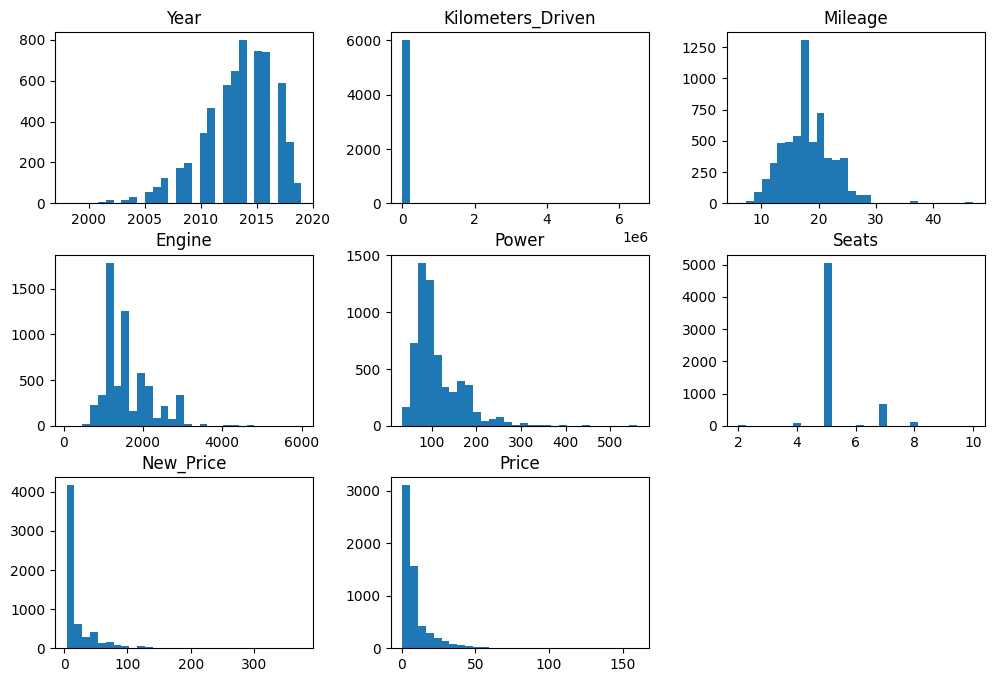

In [39]:
df.hist(grid=False, figsize =(12,8), bins =30)

From above histogram diagram of the dataset, my target which is the price is right skewed, and i will need to resolve this using log tranformation
to ensure it is changed to normal distribution

In [40]:
df.insert(len(df.columns),'Log_price',
         np.log(df['Price']))

In [41]:
from utils import histogram_boxplot, labeled_barplot

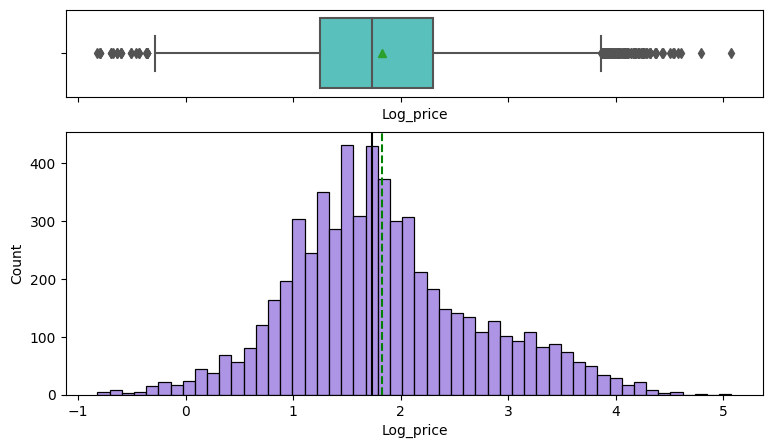

In [42]:
# check the distribution of the target

histogram_boxplot(data = df, feature = "Log_price")

The Log price is normally distributed now

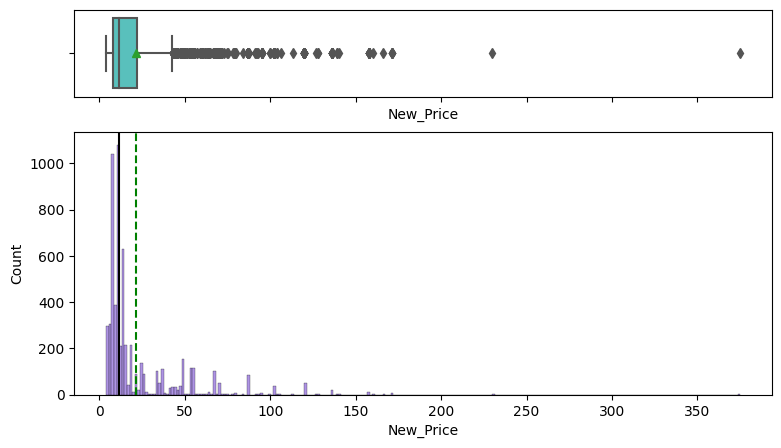

In [43]:
histogram_boxplot(df, "New_Price")

In [ ]:
The new price is right skewed and it ranged between 10 to 160. I will have to drop the New Price column

## Categorical Data Plot

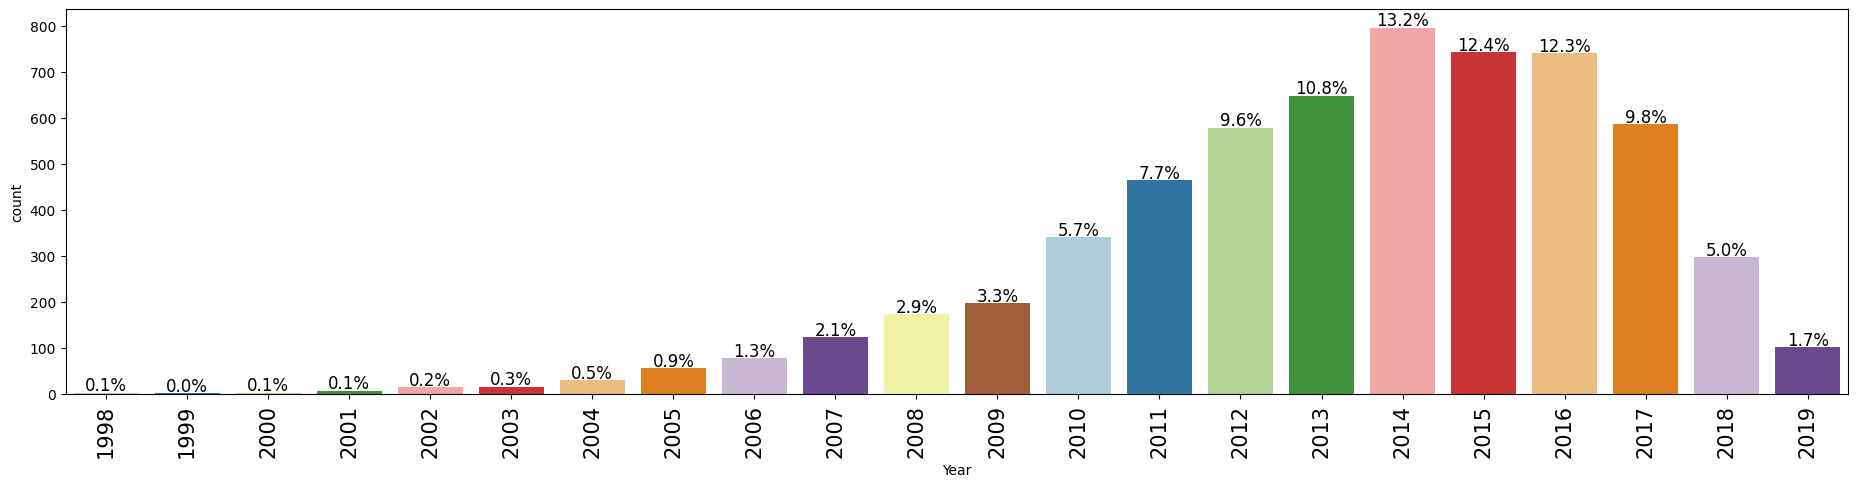

In [45]:
labeled_barplot(df, "Year", perc=True)

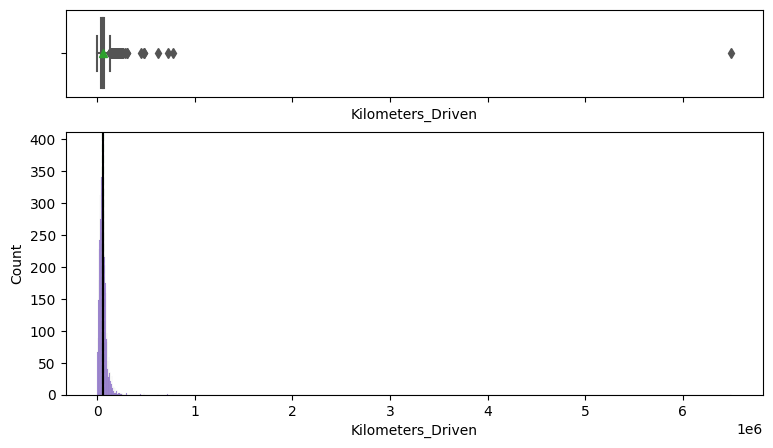

In [47]:
histogram_boxplot(df, "Kilometers_Driven")

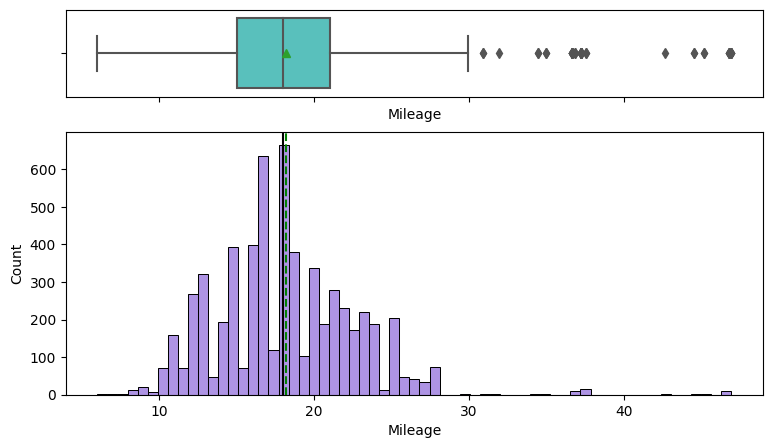

In [49]:
histogram_boxplot(df, "Mileage")

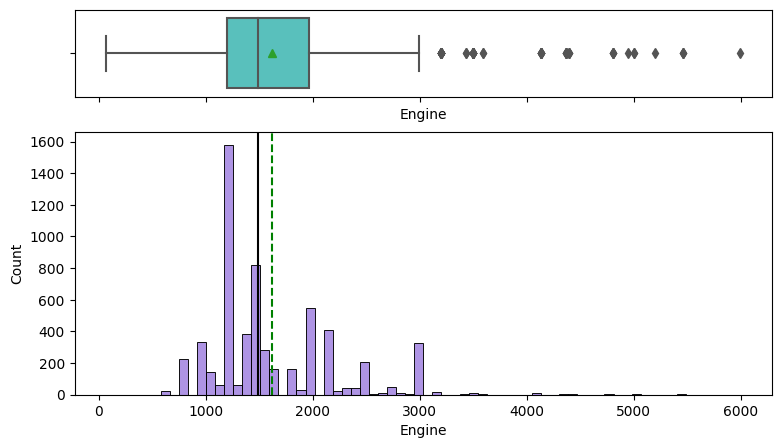

In [51]:
histogram_boxplot(df, "Engine")

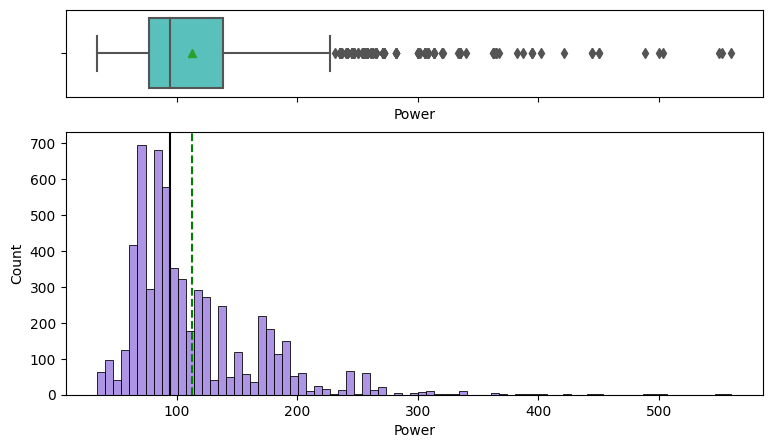

In [53]:
histogram_boxplot(df, "Power")

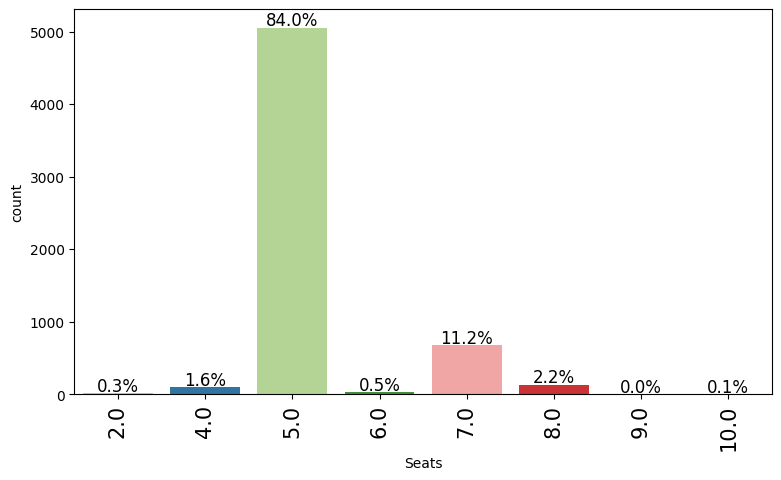

In [54]:
labeled_barplot(df, "Seats", perc=True)

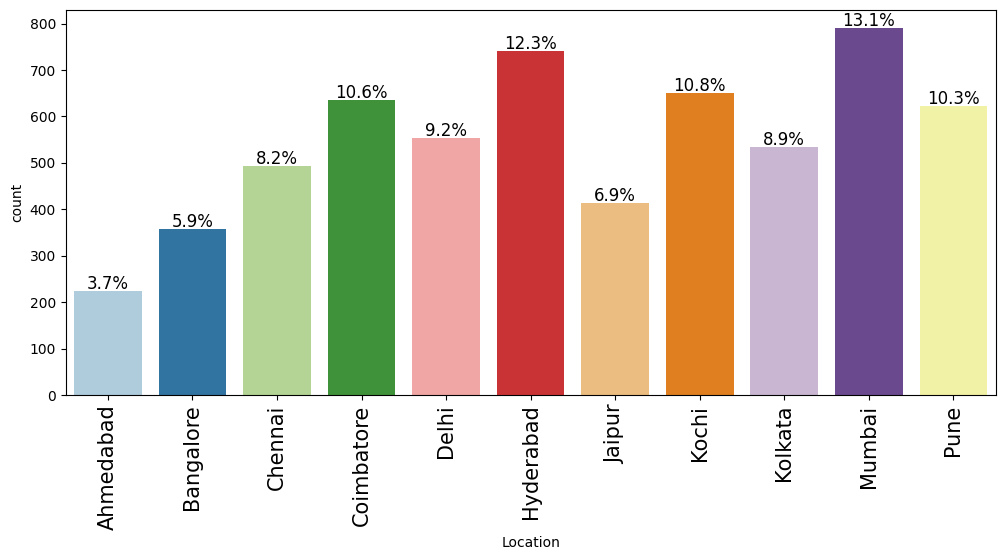

In [55]:
labeled_barplot(df, "Location", perc=True)

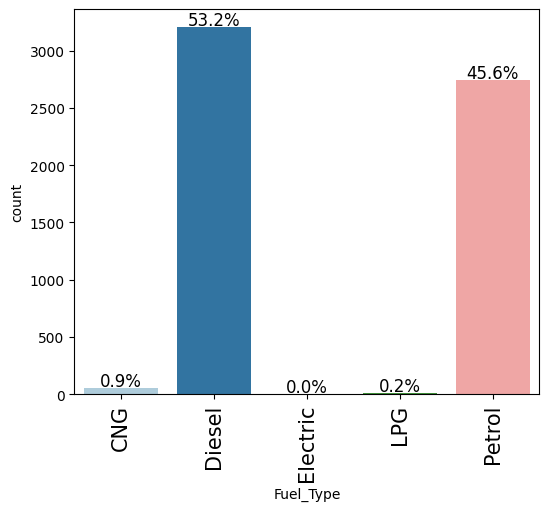

In [56]:
labeled_barplot(df, "Fuel_Type", perc=True)

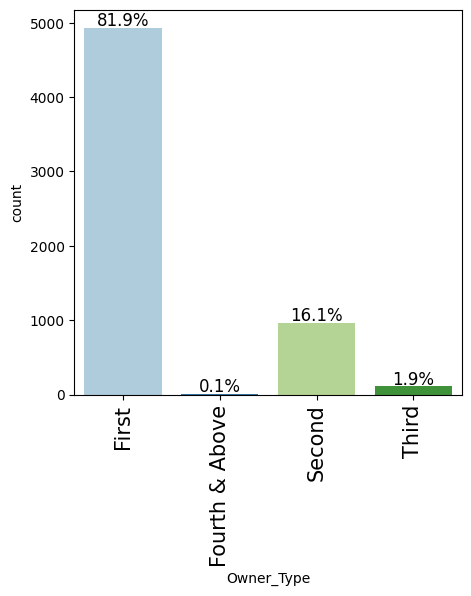

In [57]:
labeled_barplot(df, "Owner_Type", perc=True)

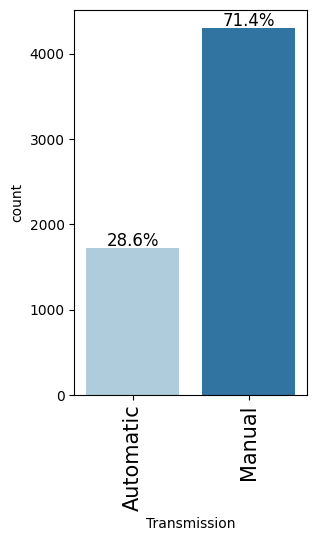

In [58]:
labeled_barplot(df, "Transmission", perc=True)

## Observation

Majority of the cars been sold are manual cars with 71.4%
And people prefer to buy cars from First hand owner Type as the percentage is 81.9%
The fueltype mostly used by th cars are Diesel and petrol but diesel have more demand than the petrol 
And the location with the high demands for used cars are in Mumbai and Hyperabad and Pune

## Bivariate Analysis of the dataset

<AxesSubplot:>

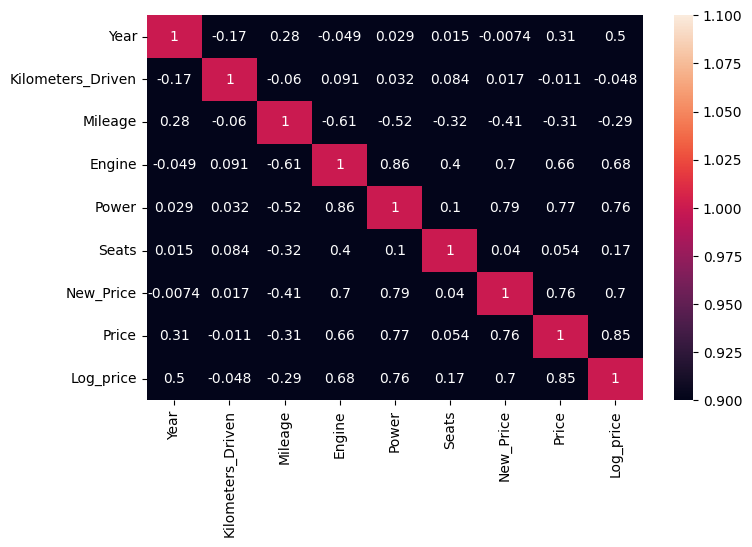

In [59]:
corr_all = df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(corr_all, vmin=1, annot= True)

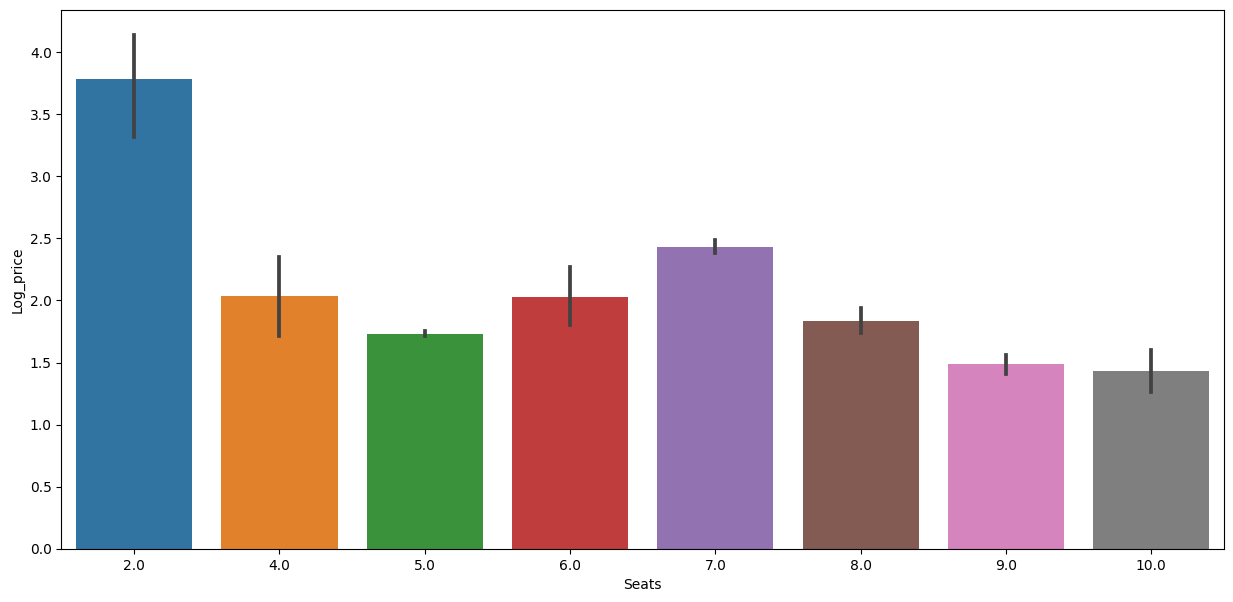

In [64]:
plt.figure(figsize=(15, 7))
sns.barplot(y="Log_price", x="Seats", data=df)
plt.show()

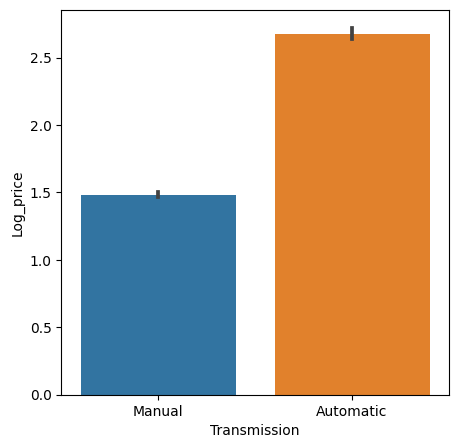

In [63]:
plt.figure(figsize=(5, 5))
sns.barplot(y="Log_price", x="Transmission", data=df)
plt.show()

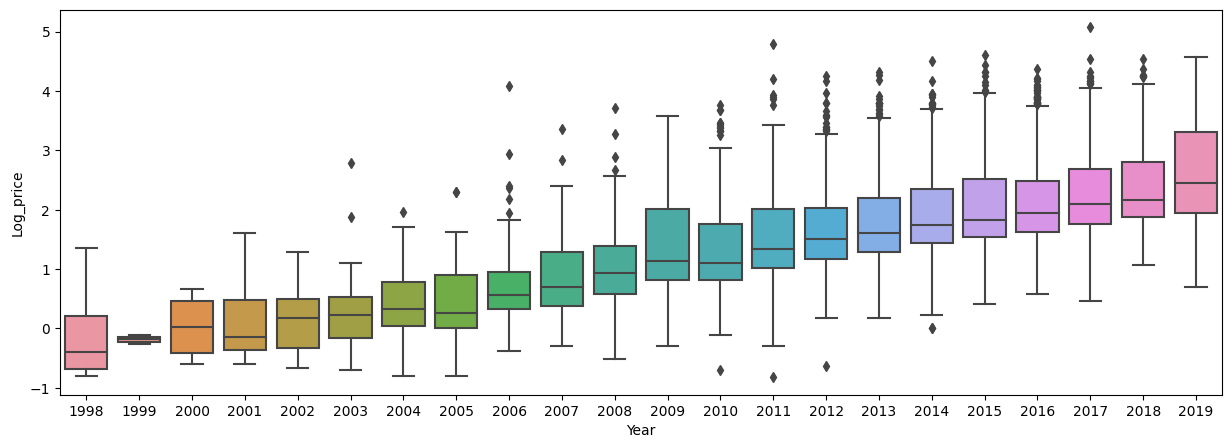

In [66]:
plt.figure(figsize=(15, 5))
sns.boxplot(y="Log_price", x="Year", data=df)
plt.show()

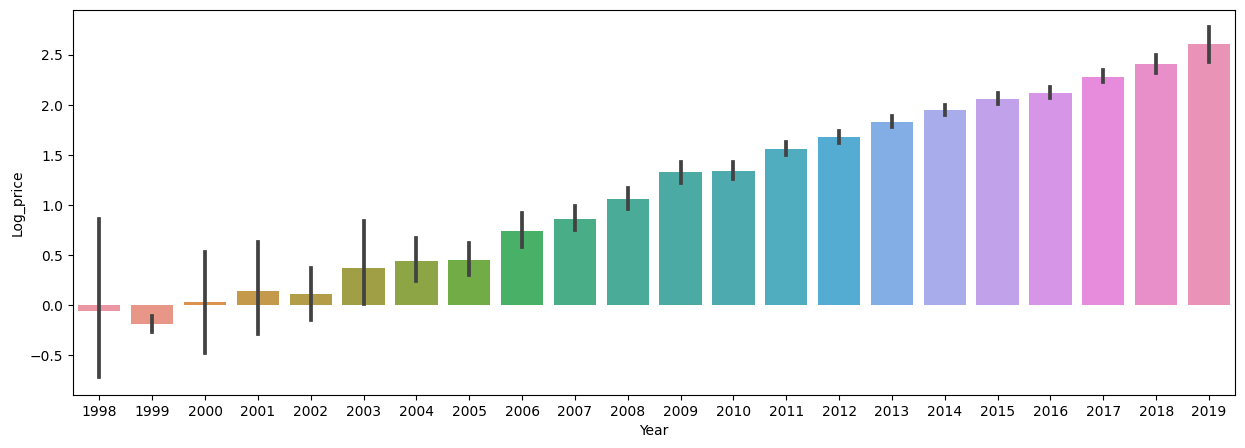

In [67]:
plt.figure(figsize=(15, 5))
sns.barplot(y="Log_price", x="Year", data=df)
plt.show()

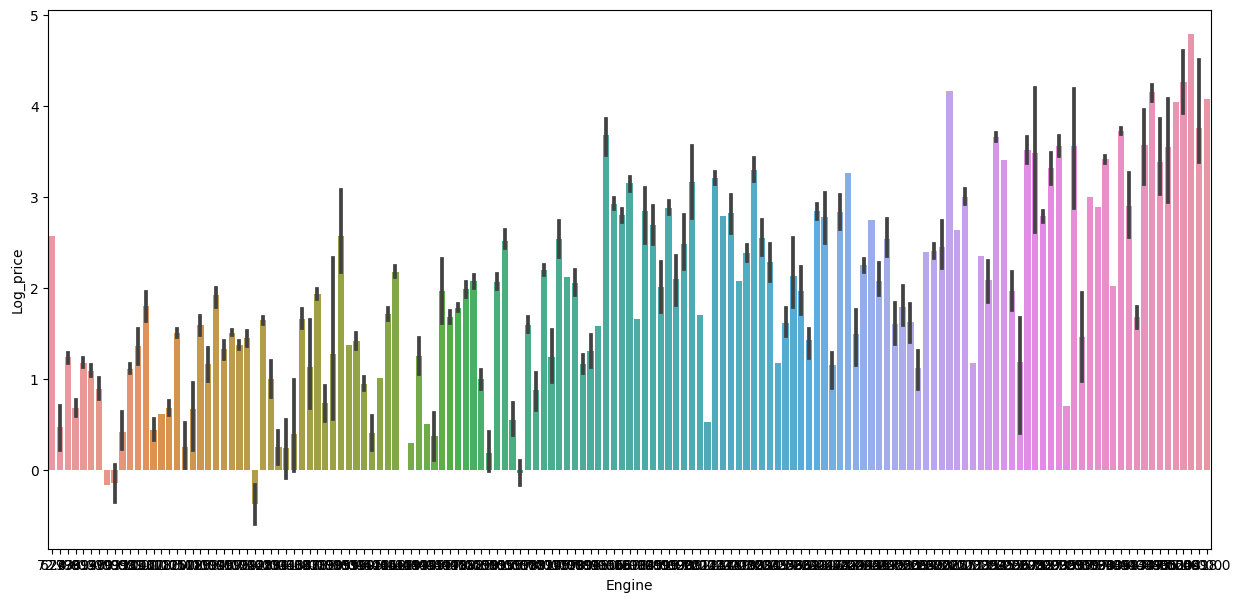

In [68]:
plt.figure(figsize=(15, 7))
sns.barplot(y="Log_price", x="Engine", data=df)
plt.show()

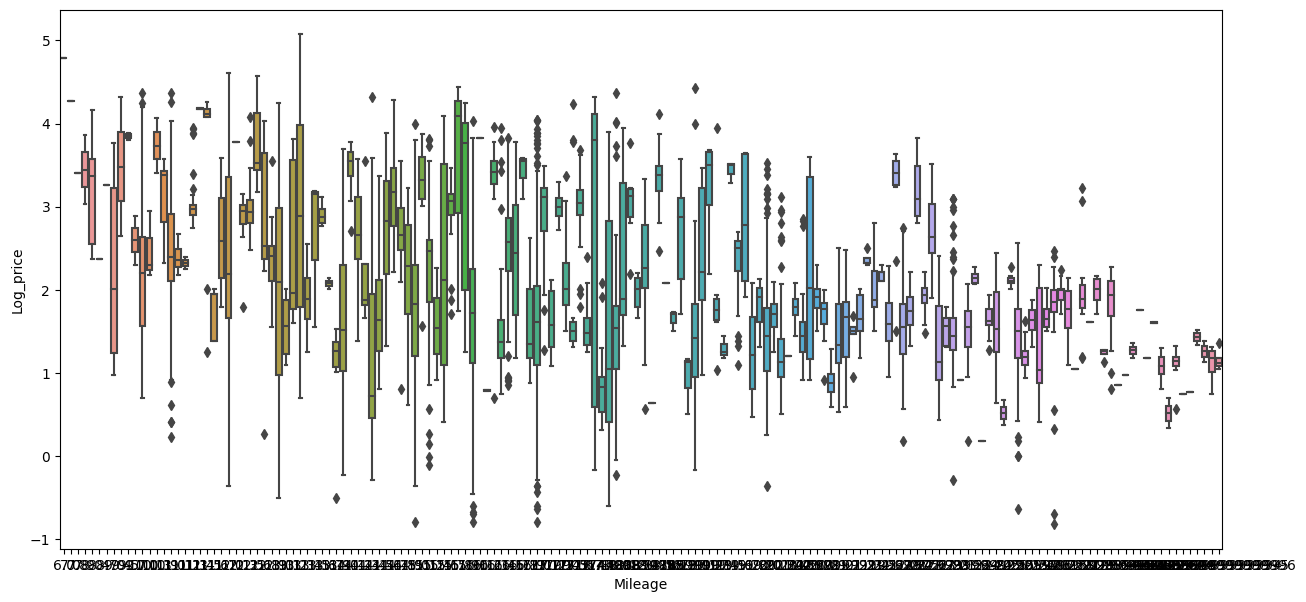

In [69]:
plt.figure(figsize=(15, 7))
sns.boxplot(y="Log_price", x="Mileage", data=df)
plt.show()

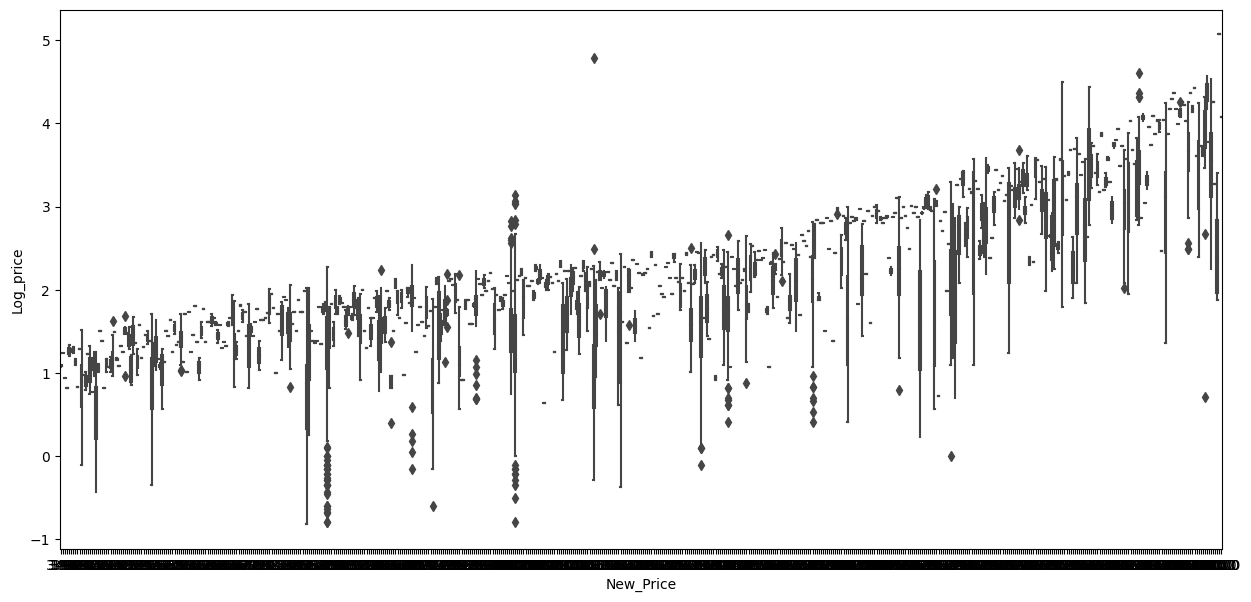

In [70]:
plt.figure(figsize=(15, 7))
sns.boxplot(y="Log_price", x="New_Price", data=df)
plt.show()

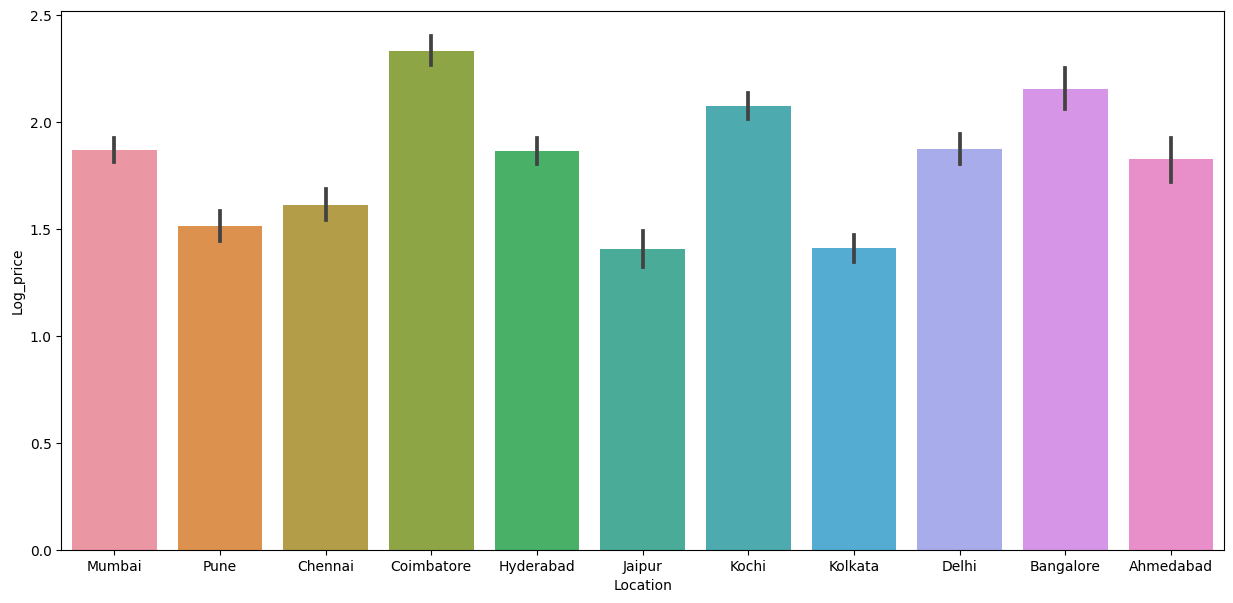

In [128]:
plt.figure(figsize=(15, 7))
sns.barplot(y="Log_price", x="Location", data=df)
plt.show()

## Observation

The cars with 2 Seats have the highest range of the price, followed by cars with 7 Seats while the cars with 5 seats have moderate prices.
The years of the cars equally have a great influence on the price of the cars. tThe less the year the higher the price. so most buyers prefer to buy most recent year cars.
Automatics transmission type cars have higher pricing than the Manual cars.


I will be dropping the column NewPrice as it is right skewed and it has higher colinarity wit the price column.
I will equally be droping the Price Column, its skewed and i have resolved the skewness with  a Log_price column as the new target

In [72]:
df = df.drop(["New_Price","Price"], axis =1)

df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Log_price
0,Mumbai,2010,72000,CNG,Manual,First,37.24,998.0,58.16,5.0,0.559616
1,Pune,2015,41000,Diesel,Manual,First,19.60,1582.0,126.20,5.0,2.525729
2,Chennai,2011,46000,Petrol,Manual,First,18.00,1199.0,88.70,5.0,1.504077
3,Chennai,2012,87000,Diesel,Manual,First,20.70,1248.0,88.76,7.0,1.791759
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.00,1968.0,140.80,5.0,2.875822


In [73]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Location,6019,11,Mumbai,790,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6019.0,NaN,NaN,NaN,2013.358199,3.269742,1998.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,6019.0,NaN,NaN,NaN,58738.380296,91268.843206,171.0,34000.0,53000.0,73000.0,6500000.0
Fuel_Type,6019,5,Diesel,3205,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,6019,2,Manual,4299,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,6019,4,First,4929,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,6019.0,NaN,NaN,NaN,18.193622,4.493709,6.0,15.0,18.0,21.0,46.956
Engine,6019.0,NaN,NaN,NaN,1620.23675,599.745981,72.0,1198.0,1493.0,1969.0,5998.0
Power,6019.0,NaN,NaN,NaN,112.788349,53.333432,34.2,77.0,94.68,138.03,560.0
Seats,6019.0,NaN,NaN,NaN,5.277621,0.803479,2.0,5.0,5.0,5.0,10.0


## Select feature and break them into x and y

In [74]:
x = df.drop("Log_price", axis =1)
y = df["Log_price"]

In [75]:
x.shape

(6019, 10)

In [76]:
y.shape

(6019,)

## Creating One hot encoder to convert the text columns into Numeric Data

In [77]:
x = pd.get_dummies(x,drop_first = True)

In [78]:
x.shape

(6019, 24)

In [79]:
x.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Seats,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,...,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third
0,2010,72000,37.24,998.0,58.16,5.0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,2015,41000,19.60,1582.0,126.20,5.0,0,0,0,0,...,0,1,1,0,0,0,1,0,0,0
2,2011,46000,18.00,1199.0,88.70,5.0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
3,2012,87000,20.70,1248.0,88.76,7.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,2013,40670,15.00,1968.0,140.80,5.0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


## Splitting of Dataset

In [80]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,
                                                   random_state = 0)

In [81]:
x_train.shape

(4815, 24)

## Perform Data Normalisation

In [82]:
## Normalisation of my data into the same Range using standard scaler

Scaler = StandardScaler()
x_train_sc = Scaler.fit_transform(x_train)
x_test_sc = Scaler.transform(x_test)

## Build Linear Regression

In [83]:
Lin_reg = LinearRegression()
Lin_reg.fit(x_train_sc,y_train)

LinearRegression()

## Model Performance Function

In [84]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "Mape": mape,
        },
        index=[0],
    )

    return df_perf

In [85]:
# Performance on the train set

train_pf = model_performance_regression(Lin_reg, x_train_sc, y_train)

In [86]:
train_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.302723,0.22295,0.879903,0.879301,inf


In [87]:
# Performance on Test Set
test_pf = model_performance_regression(Lin_reg, x_test_sc, y_test)

In [88]:
test_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.317116,0.228823,0.868758,0.866086,inf


Observation

The R^2 of the train and test data are close to each other with Linear regression and the R^2 and adjusted R-squared are similiar.
This means that my model is able to generalise well
Root Mean Squared Error of train and test data are equally close
Mean Absolute Error indicates that the linear regression model is able to predict the price within mean error of 0.22 on test data.


## Ridge

In [89]:
ridge = Ridge()

ridge.fit(x_train_sc,y_train)

Ridge()

In [90]:
# Ridge regressor Train performance

ridge_train_pf = model_performance_regression(ridge, x_train_sc, y_train)

In [91]:
ridge_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.302723,0.222961,0.879903,0.879301,inf


In [92]:
#Ridge Regressor Test Performance

ridge_test_pf = model_performance_regression(ridge, x_test_sc, y_test)
ridge_test_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.317112,0.228836,0.868761,0.86609,inf


...Observation.


The Ridge and the Linear regression Model produced similar result both with the train dataset and test dataset

## Lasso Regression

In [93]:
lass= Lasso()

In [94]:
lass.fit(x_train_sc,y_train)
lass_train_pf = model_performance_regression(lass, x_train_sc, y_train)

In [95]:
lass_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.873532,0.675317,0.0,-0.00501,inf


In [96]:
lass_test_pf = model_performance_regression(lass, x_test_sc, y_test)
lass_test_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.875914,0.685536,-0.001294,-0.021677,inf


In [97]:
# check with other value of alpha in Lasso
lass= Lasso(alpha = 0.01)

In [98]:
lass.fit(x_train_sc,y_train)
lass_train_pf = model_performance_regression(lass, x_train_sc, y_train)

In [99]:
lass_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.305315,0.224952,0.877837,0.877225,inf


In [100]:
lass_test_pf = model_performance_regression(lass, x_test_sc, y_test)
lass_test_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.317086,0.229136,0.868782,0.866111,inf


In [101]:
lass.coef_

array([ 0.40177466, -0.        , -0.04610068,  0.12022193,  0.37021813,
        0.        ,  0.03409854,  0.        ,  0.02477988, -0.        ,
        0.03392557, -0.01317192, -0.        , -0.05117291, -0.        ,
       -0.00802355,  0.06305529,  0.00470273, -0.        , -0.06946255,
       -0.14289145,  0.        , -0.01752877, -0.01110791])

...Observation.
The R^2 score of the train dataset when alpha default value was used produced 0.0 R^2 but when the value of Alpha was changed to 0.01,
the R^2 produces accuracy of 87.8 which is close to the resultof both Linear Regression and Ridge. 
The r^2 on the test dataset with alpha of 0.01 produces 86.6 which is alos the in the range of result produced by Ridge and Linear Regression.

Mean Absolute Error indicates that the lasso regression model is able to predict the price within mean error of 0.22 on test data.
    

## Forward Feature Selection

I will try using forward feature selection on the data to check if we can get a good model performance using a lesser number of features.



In [102]:
pip install mlxtend==0.20.0


[notice] A new release of pip available: 22.3.1 -> 23.0
[notice] To update, run: C:\Users\Elitebook g3\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.7_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [103]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lin_reg = LinearRegression()

# Build step forward feature selection

# from the data after one hot encoder, i have 24 feature but i will only set k features to all in this instance
sfs = SFS(
    lin_reg,
    k_features=x_train.shape[1],
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    6.4s finished

[2023-02-05 22:23:18] Features: 1/24 -- score: 0.5727296849113882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  23 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2023-02-05 22:23:18] Features: 2/24 -- score: 0.8109434082911852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2023-02-05 22:23:18] Features: 3/24 -- score: 0.8367331526587819[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.1s finished

[2023-02-05 22:23:18] Features: 4/24 -- score: 0.85

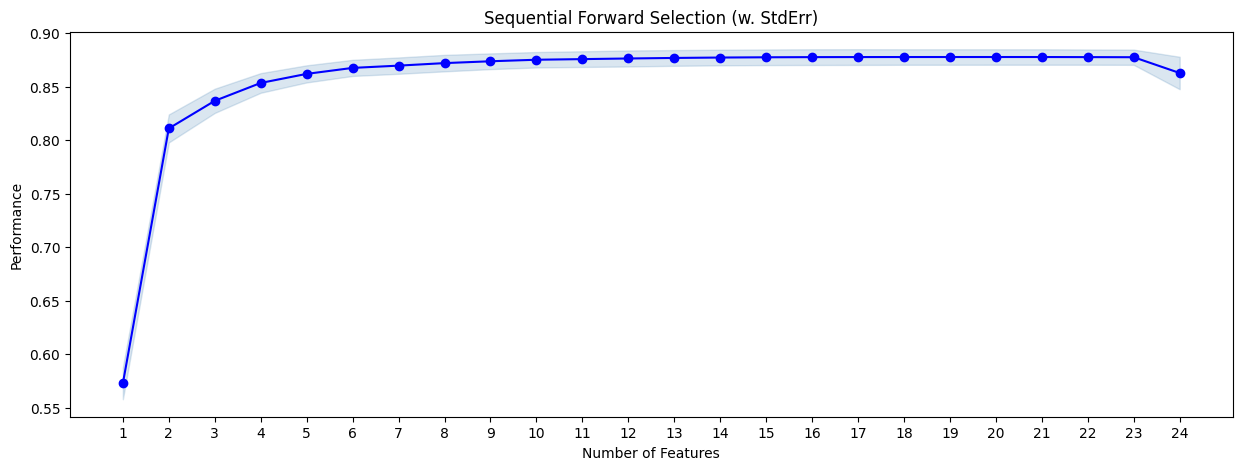

In [104]:
# plot the performance with addition of each feature
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

fig1 = plot_sfs(sfs.get_metric_dict(), kind="std_err", figsize=(15, 5))
plt.title("Sequential Forward Selection (w. StdErr)")
plt.show()

We will consider using 12 features as the graphs shows that the performance was steady at 12 features

In [109]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

lin_reg = LinearRegression()

# Build step forward feature selection

# from the data after one hot encoder, i have 24 feature but i will only set k features to all in this instance
sfs = SFS(
    lin_reg,
    k_features=12,
    forward=True,  # k_features denotes "Number of features to select"
    floating=False,
    scoring="r2",
    verbose=2,
    n_jobs=-1,  # this will ensure all CPU cores are being used for computation
    cv=5,
)

# Perform SFFS
sfs = sfs.fit(x_train_sc, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    2.6s finished

[2023-02-05 22:42:07] Features: 1/12 -- score: 0.5727296849113882[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  23 | elapsed:    0.0s finished

[2023-02-05 22:42:07] Features: 2/12 -- score: 0.8109434082911852[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  22 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  22 out of  22 | elapsed:    0.1s finished

[2023-02-05 22:42:07] Features: 3/12 -- score: 0.8367331526587819[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 out of  21 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:    0.0s finished

[2023-02-05 22:42:07] Features: 4/12 -- score: 0.85

## Select the important Features that contributes to the model

In [110]:
sfs.k_feature_idx_

(0, 2, 3, 4, 6, 8, 10, 13, 16, 19, 20, 22)

In [111]:
feat_cols = list(sfs.k_feature_idx_)
feat_cols

[0, 2, 3, 4, 6, 8, 10, 13, 16, 19, 20, 22]

In [127]:
x_train_new = x_train[x_train.columns[feat_cols]]
x_train_new

,Year,Mileage,Engine,Power,Location_Bangalore,Location_Coimbatore,Location_Hyderabad,Location_Kolkata,Fuel_Type_Diesel,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Second
3509,2017,22.5,1396.0,88.73,0,1,0,0,1,0,1,1
3332,2013,17.2,1493.0,100.00,0,0,0,0,1,0,1,0
5383,2005,16.0,1405.0,70.00,0,0,1,0,1,0,1,1
1891,2014,17.0,1248.0,75.00,0,0,0,0,1,0,1,0
5757,2017,13.6,2393.0,147.80,0,0,0,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4931,2016,18.4,1493.0,100.00,0,0,0,0,1,0,1,0
3264,2006,12.9,2494.0,100.60,0,0,0,0,1,0,1,1
1653,2012,12.0,2179.0,120.00,0,0,0,1,1,0,1,0
2607,2017,22.0,1582.0,126.20,0,0,0,0,1,0,1,0


In [114]:
x_test_new =x_test[x_test.columns[feat_cols]]

## Redo  the sequentiol Feature selection with the few features that are important based on graph and feat_cols

In [115]:
Lin_reg_sfs = LinearRegression()
Lin_reg_sfs.fit(x_train_new,y_train)

LinearRegression()

In [116]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "Mape": mape,
        },
        index=[0],
    )

    return df_perf

In [118]:
# Performance on the train set

sfs_train_pf = model_performance_regression(Lin_reg_sfs, x_train_new, y_train)

In [119]:
sfs_train_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.305265,0.224726,0.877877,0.877572,inf


In [120]:
# Performance on the test set

sfs_test_pf = model_performance_regression(Lin_reg_sfs, x_test_new, y_test)

In [121]:
sfs_test_pf

,RMSE,MAE,R-squared,Adj. R-squared,Mape
0,0.317431,0.229396,0.868497,0.867172,inf


In [124]:
# training performance comparison

models_train_comp_df = pd.concat(
    [train_pf.T, sfs_train_pf.T], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.302723,0.305265
MAE,0.222950,0.224726
R-squared,0.879903,0.877877
Adj. R-squared,0.879301,0.877572
Mape,inf,inf


In [126]:
# test performance comparison

models_test_comp_df = pd.concat(
    [test_pf.T, sfs_test_pf.T], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression sklearn",
    "Linear Regression sklearn (SFS features)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression sklearn,Linear Regression sklearn (SFS features)
RMSE,0.317116,0.317431
MAE,0.228823,0.229396
R-squared,0.868758,0.868497
Adj. R-squared,0.866086,0.867172
Mape,inf,inf


Insights

    With this linear regression model, 86.8% of the variation in the dataset was captured 
    
    From the above analysis of our data set,Year i.e the recent the year, increases the price of the car.
    The Power also increses the price of the car.
    The Location equally affets the increase in prices of the car and the seat number as it was obsrved that cars with 2 seats are more expensive
    The engine size of the car also add to the increase in the prices of used cars.
    

In [ ]:
Business Recommendations

    

In [131]:
Lin_reg.coef_

array([ 0.41137513, -0.00944177, -0.07706996,  0.10730741,  0.370371  ,
       -0.00864044,  0.03426314, -0.00071636,  0.01784482, -0.02093998,
        0.02890747, -0.03053104, -0.01614034, -0.07195654, -0.01756212,
       -0.02699259,  0.01553168,  0.0131461 , -0.00607913, -0.13539224,
       -0.14287155,  0.00473039, -0.02827596, -0.02122378])